In [33]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/root/Desktop/winequality-red.csv')

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)


In [15]:
train.shape

(1119, 12)

In [16]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1348,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,5
1313,7.0,0.360,0.21,2.3,0.086,20.0,65.0,0.99558,3.40,0.54,10.1,6
360,8.2,0.700,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4,5
467,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
949,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7


In [17]:
test.shape

(480, 12)

In [18]:
# Normalizing the data
train_x = train.drop('quality', axis=1)
train_y = train['quality']
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [19]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1348,0.236364,0.366438,0.03,0.089109,0.069808,0.089552,0.021201,0.441736,0.472441,0.012270,0.196429
1313,0.218182,0.164384,0.21,0.138614,0.083770,0.283582,0.208481,0.419650,0.519685,0.104294,0.303571
360,0.327273,0.397260,0.23,0.108911,0.106457,0.194030,0.265018,0.550647,0.354331,0.202454,0.178571
467,0.381818,0.232877,0.45,0.168317,0.047120,0.089552,0.042403,0.352628,0.456693,0.257669,1.000000
949,0.390909,0.000000,0.45,0.089109,0.064572,0.134328,0.053004,0.415080,0.527559,0.239264,0.625000


In [20]:
train_y.head()

1348    5
1313    6
360     5
467     6
949     7
Name: quality, dtype: int64

In [21]:
train_y.max()

8

In [24]:
train_y.min()

3

In [26]:
no_features = train_x.shape[1]

In [27]:
no_features

11

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[no_features]),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [29]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [30]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [31]:
callbacks = MyCallback()

In [32]:
history = model.fit(train_x, train_y, epochs=500, callbacks=[callbacks])

Epoch 1/500
35/35 [==============================] - 0s 3ms/step - loss: 16.7446 - mae: 3.8045
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 1.1479 - mae: 0.8370
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 0.8352 - mae: 0.7219
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7775 - mae: 0.6939
Epoch 5/500
35/35 [==============================] - 0s 3ms/step - loss: 0.7407 - mae: 0.6745
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7087 - mae: 0.6595
Epoch 7/500
35/35 [==============================] - 0s 3ms/step - loss: 0.6994 - mae: 0.6518
Epoch 8/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6706 - mae: 0.6373
Epoch 9/500
35/35 [==============================] - 0s 3ms/step - loss: 0.6554 - mae: 0.6297
Epoch 10/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6434 - mae: 0.6235
Epoch 11/500
35/35 [==============================] - 0s 2

35/35 [==============================] - 0s 2ms/step - loss: 0.4012 - mae: 0.4971
Epoch 88/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4114 - mae: 0.5037
Epoch 89/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4191 - mae: 0.5033
Epoch 90/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4152 - mae: 0.5053
Epoch 91/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4087 - mae: 0.4979
Epoch 92/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4167 - mae: 0.4991
Epoch 93/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3997 - mae: 0.4914
Epoch 94/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4043 - mae: 0.4934
Epoch 95/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3982 - mae: 0.4961
Epoch 96/500
35/35 [==============================] - 0s 4ms/step - loss: 0.3948 - mae: 0.4903
Epoch 97/500
35/35 [==============================] - 0s 3ms/st

35/35 [==============================] - 0s 2ms/step - loss: 0.3821 - mae: 0.4820
Epoch 173/500
35/35 [==============================] - 0s 3ms/step - loss: 0.3844 - mae: 0.4825
Epoch 174/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3880 - mae: 0.4829
Epoch 175/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3922 - mae: 0.4885
Epoch 176/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3932 - mae: 0.4865
Epoch 177/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3917 - mae: 0.4875
Epoch 178/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3794 - mae: 0.4803
Epoch 179/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3950 - mae: 0.4908
Epoch 180/500
35/35 [==============================] - 0s 3ms/step - loss: 0.3930 - mae: 0.4875
Epoch 181/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3856 - mae: 0.4859
Epoch 182/500
35/35 [==============================] -

35/35 [==============================] - 0s 2ms/step - loss: 0.3828 - mae: 0.4826
Epoch 258/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3694 - mae: 0.4730
Epoch 259/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3800 - mae: 0.4812
Epoch 260/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3853 - mae: 0.4834
Epoch 261/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3854 - mae: 0.4828
Epoch 262/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3704 - mae: 0.4742
Epoch 263/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3773 - mae: 0.4761
Epoch 264/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3775 - mae: 0.4763
Epoch 265/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3698 - mae: 0.4702
Epoch 266/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3761 - mae: 0.4816
Epoch 267/500
35/35 [==============================] -

35/35 [==============================] - 0s 2ms/step - loss: 0.3608 - mae: 0.4661
Epoch 343/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3540 - mae: 0.4605
Epoch 344/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3615 - mae: 0.4654
Epoch 345/500
35/35 [==============================] - 0s 3ms/step - loss: 0.3573 - mae: 0.4627
Epoch 346/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3596 - mae: 0.4631
Epoch 347/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3540 - mae: 0.4641
Epoch 348/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3565 - mae: 0.4634
Epoch 349/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3608 - mae: 0.4707
Epoch 350/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3568 - mae: 0.4635
Epoch 351/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3635 - mae: 0.4688
Epoch 352/500
35/35 [==============================] -

Text(0.5, 0, 'Epochs')

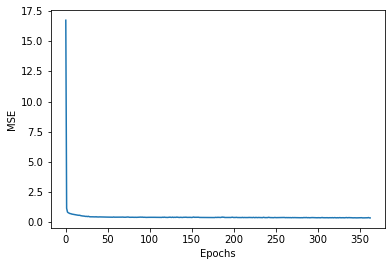

In [34]:
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

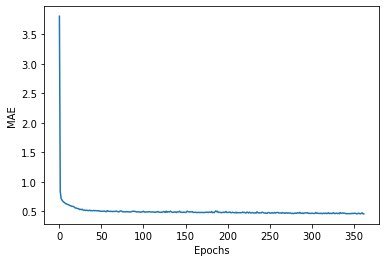

In [35]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [38]:
test_mse, test_mae = model.evaluate(test_x, test_y)

15/15 [==============================] - 0s 2ms/step - loss: 0.5171 - mae: 0.5573


In [37]:
test_mse

0.517126202583313

In [39]:
test_mae

0.5572954416275024

In [40]:
train.to_csv('train_data.csv',index=None)

In [41]:
test.to_csv('test_data.csv',index=None)

In [42]:
tf.saved_model.save(model, 'saved_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/assets
